# Setup


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.1/994.1 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
ultralytics.checks()

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.9/112.6 GB disk)


Visualisation des ressources et utilisation GPU

In [ ]:
!nvidia-smi

Tue Apr  8 10:18:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

La sortie doit être à True

In [ ]:
import torch
torch.cuda.is_available()

True

# Préparation du dataset

Il faut que le fichier de dataset s'appelle data.Il faut ausii qu'il comporte l'arborescence suivante :
- An images folder containing the images
- A labels folder containing the labels in YOLO annotation format
- A classes.txt labelmap file that contains all the classes
- A notes.json file that contains info specific to Label Studio (this file can be ignored)

In [ ]:
# Unzip images to a custom data folder
!unzip -q /content/data.zip -d /content/custom_data

On passe ensuite à la séparation entre test et validation.

In [ ]:

!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

# TO DO: Improve robustness of train_val_split.py script so it can handle nested data folders, etc
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

# Le travail

## Importer/créer le dataset

data={dataset.location}/data.yaml

## Entrainer le modèle

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=coco128.yaml epochs=10 imgsz=640 device=0

100% 6.25M/6.25M [00:00<00:00, 354MB/s]
Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

In [ ]:
import glob
from IPython.display import Image, display

### Matrice de confusion

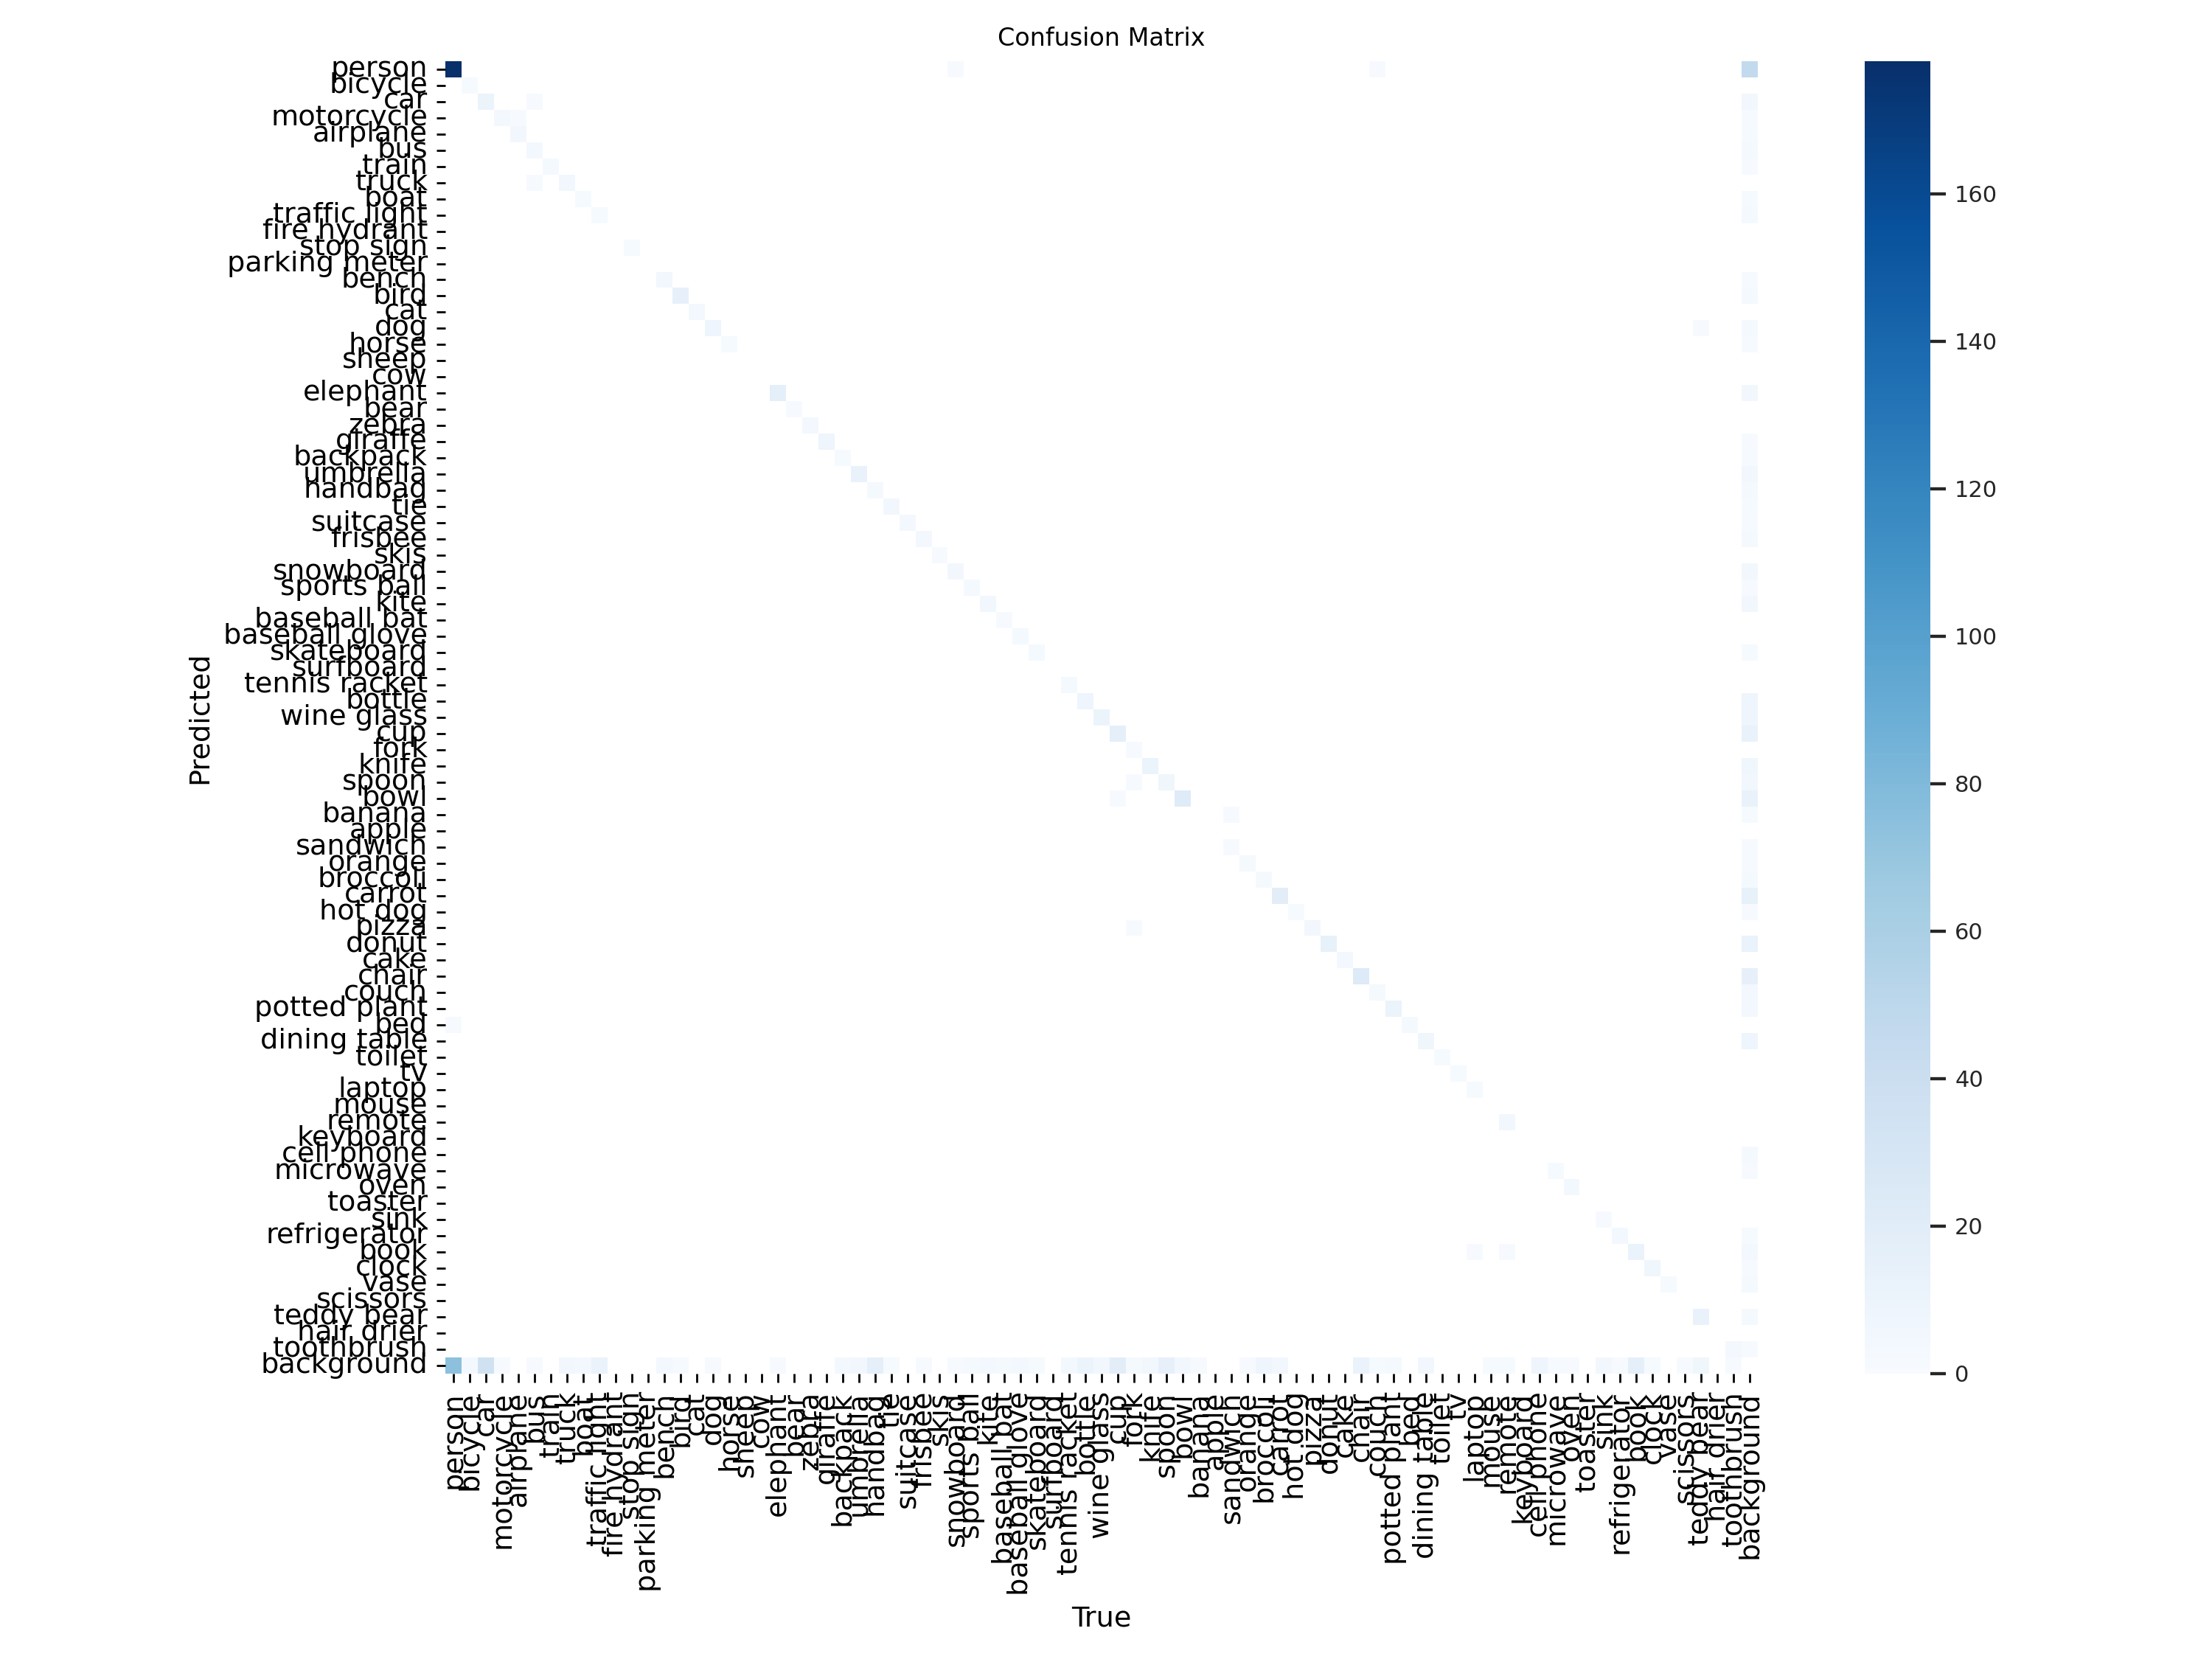

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

### Courbes de vérification

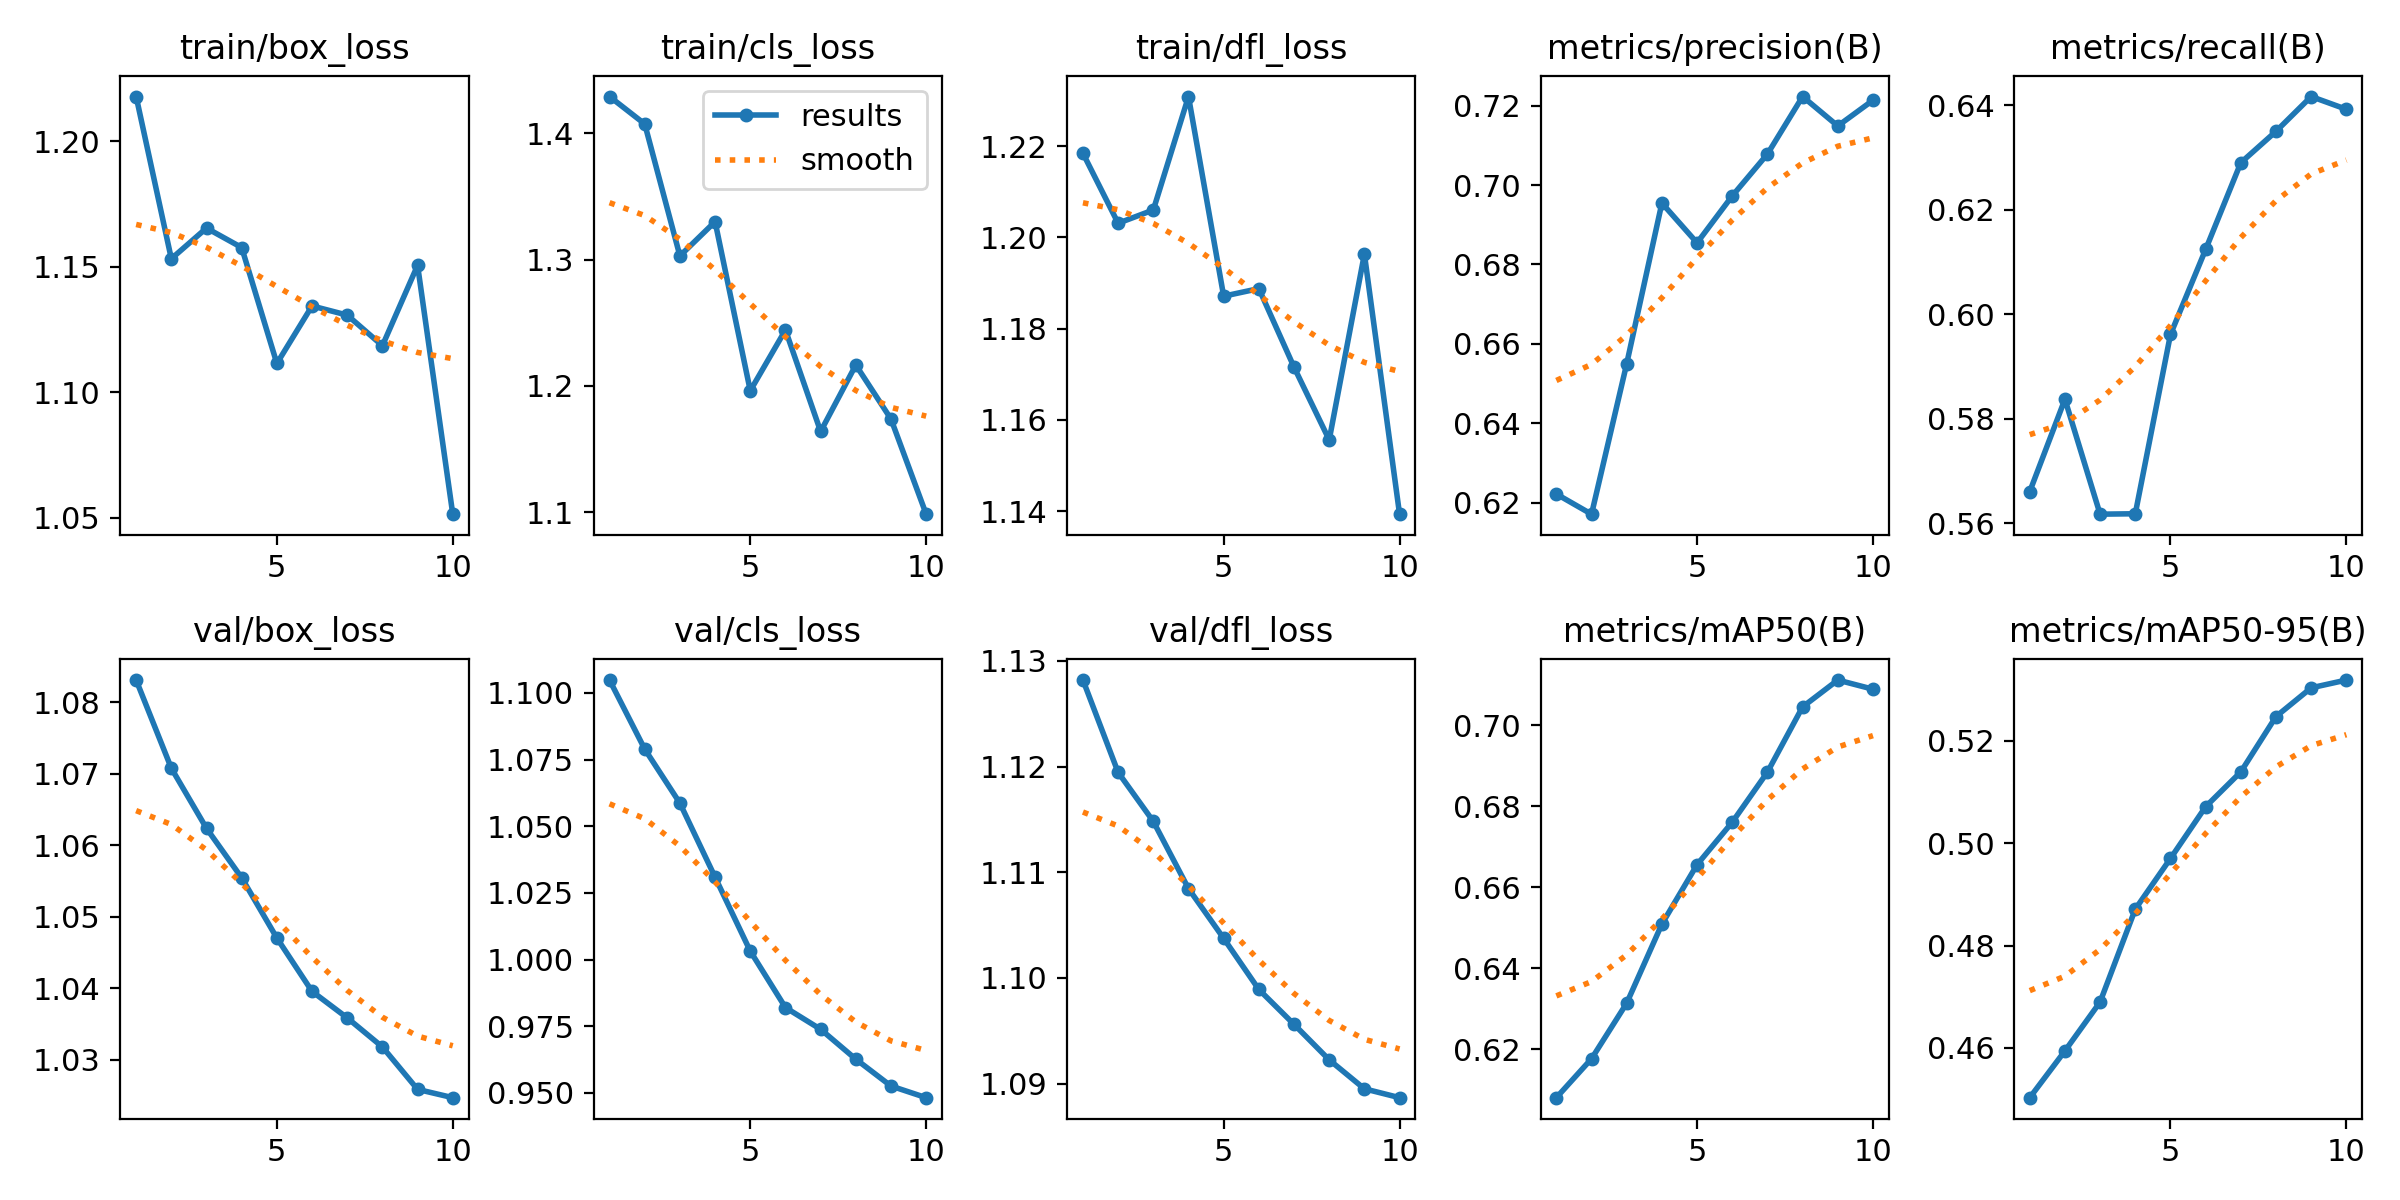

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

## Evaluer le modèle

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=coco128.yaml device=0

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:02<00:00,  2.86it/s]
                   all        128        929      0.746      0.627      0.711      0.533
                person         61        254      0.891      0.638       0.78      0.566
               bicycle          3          6      0.996      0.333      0.381      0.314
                   car         12         46      0.734      0.217      0.324      0.196
            motorcycle          4          5      0.667        0.8      0.938      0.745
              airplane          5          6       0.81          1      0.995      0.846
                   bus          5          7 

## Faire une prédiction

In [ ]:
from ultralytics.utils.downloads import download

download('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', unzip=True)

100%|██████████| 6.66M/6.66M [00:00<00:00, 70.1MB/s]
Unzipping /content/coco128.zip to /content/coco128...: 100%|██████████| 263/263 [00:00<00:00, 4255.58file/s]


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.5 source=/content/coco128/images/train2017 device=0

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/128 /content/coco128/images/train2017/000000000009.jpg: 480x640 3 bowls, 1 broccoli, 45.3ms
image 2/128 /content/coco128/images/train2017/000000000025.jpg: 448x640 1 giraffe, 40.5ms
image 3/128 /content/coco128/images/train2017/000000000030.jpg: 448x640 1 vase, 6.5ms
image 4/128 /content/coco128/images/train2017/000000000034.jpg: 448x640 1 zebra, 6.4ms
image 5/128 /content/coco128/images/train2017/000000000036.jpg: 640x512 1 person, 1 umbrella, 39.4ms
image 6/128 /content/coco128/images/train2017/000000000042.jpg: 480x640 1 dog, 8.3ms
image 7/128 /content/coco128/images/train2017/000000000049.jpg: 640x512 2 persons, 2 horses, 1 potted plant, 9.1ms
image 8/128 /content/coco128/images/train2017/000000000061.jpg: 512x640 1 person, 2 elephants, 39.5ms
image 9/128 /content/coco128/images/train2017/000000000064.jpg: 640x48

## Tester le modèle

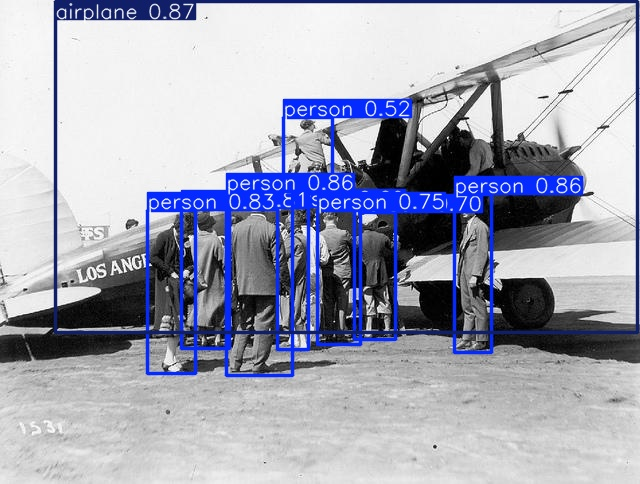

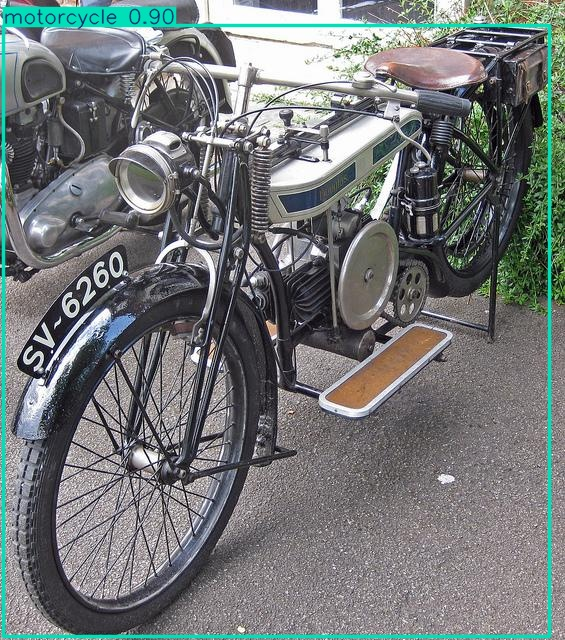

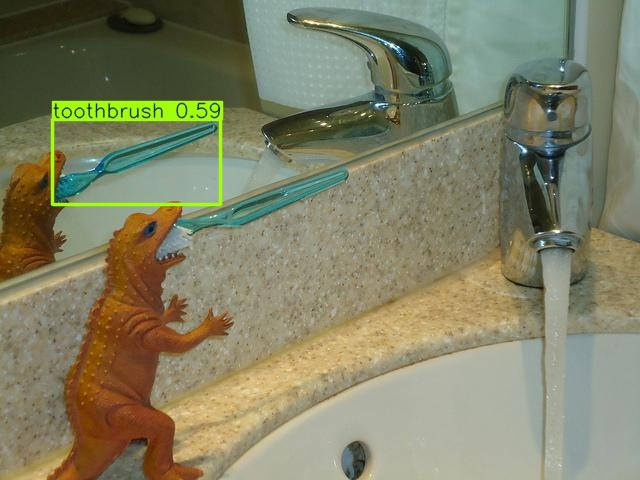

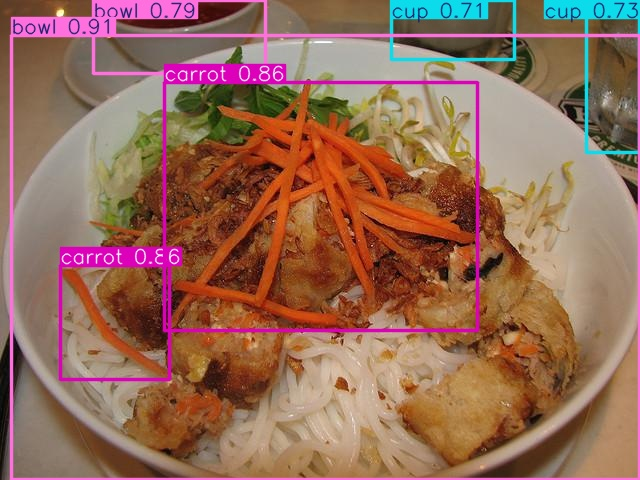

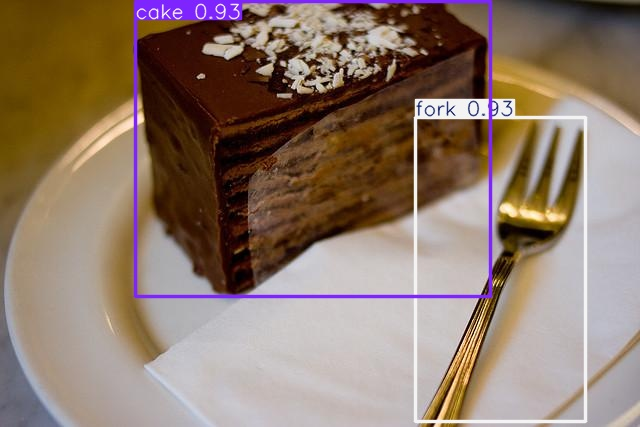

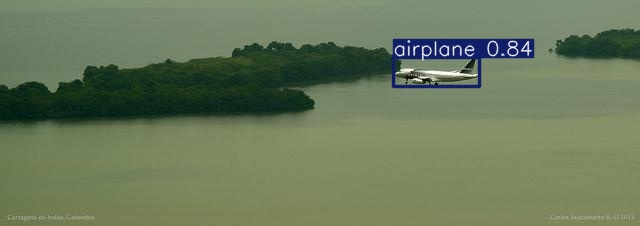

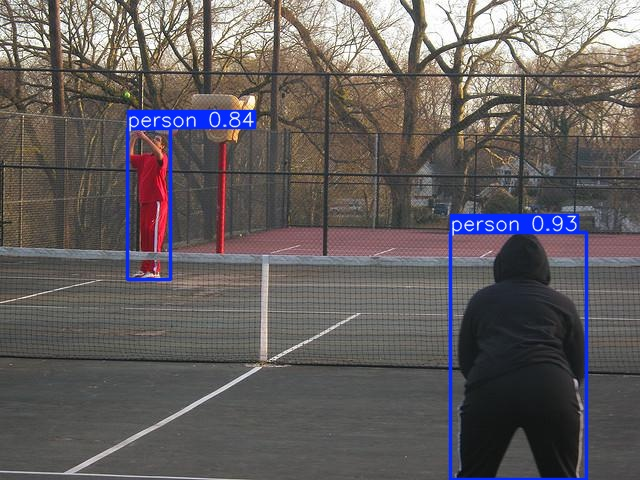

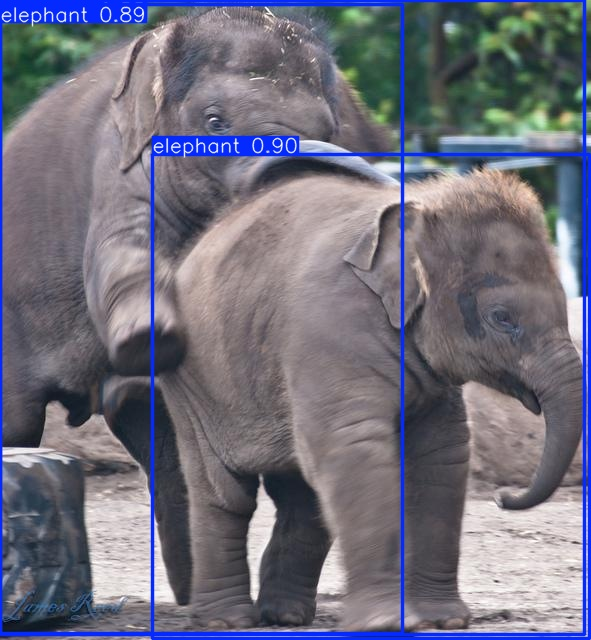

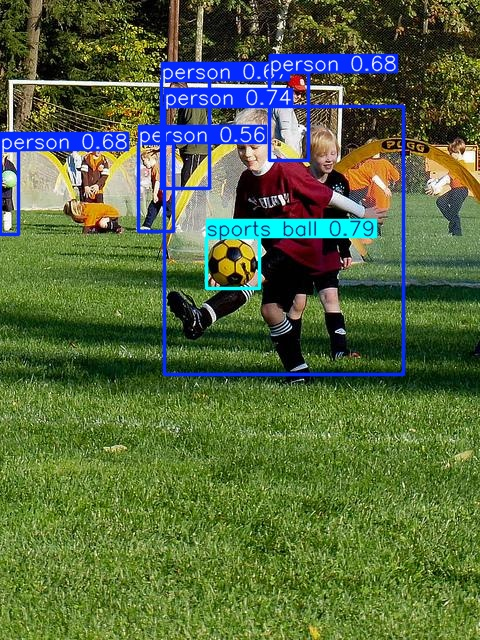

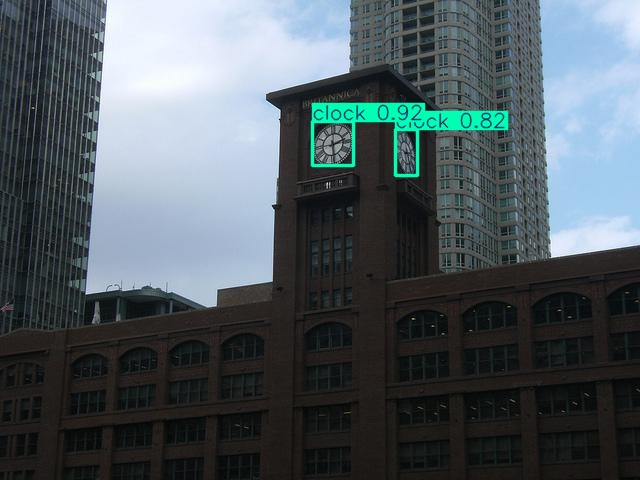

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

# Exporter un modèle

In [ ]:
#!yolo export model=path/to/best.pt format=onnx

# Télécharger le modèle

In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 9%)
  adding: train/ (stored 0%)
  adding: train/train_batch2.jpg (deflated 8%)
  adding: train/train_batch1.jpg (deflated 8%)
  adding: train/labels_correlogram.jpg (deflated 39%)
  adding: train/R_curve.png (deflated 9%)
  adding: train/val_batch1_labels.jpg (deflated 6%)
  adding: train/P_curve.png (deflated 9%)
  adding: train/val_batch0_pred.jpg (deflated 8%)
  adding: train/confusion_matrix.png (deflated 16%)
  adding: train/events.out.tfevents.1744107608.54d14f31fd9c.2336.0 (deflated 93%)
  adding: train/val_batch0_labels.jpg (deflated 8%)
  adding: train/results.csv (deflated 58%)
  adding: train/labels.jpg (deflated 23%)
  adding: train/F1_curve.png (deflated 9%)
  adding: train/val_batch1_pred.jpg (deflated 6%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 9%)
  adding: train/weights/last.pt (deflated 9%)
  adding: train/train_batch0.jpg (deflated 7%)
  adding: train/confusion_matrix_normalized

In [ ]:
# This takes forever for some reason, you can also just download the model from the sidebar

#from google.colab import files

#files.download('/content/my_model.zip')

## Utiliser sur une caméra

In [ ]:
# curl -o yolo_detect.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/yolo_detect.py

In [ ]:
#python yolo_detect.py --model my_model.pt --source usb0 --resolution 1280x720